In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 5000)
pd.set_option('display.max_rows', 1000)

from IPython.display import display, HTML

In [4]:
base_var_df = pd.read_csv('/Users/salma/Research/papers/Baltimore_FreddieGray/data/cleaned/idx_pop_arr_cr_counts.csv')

### Create trend line chart showing how each crime changed over the years w.r.t each arrest type

In [5]:
def create_trend_lines_by_grp(df, grp_col, cols, x_label, y_label, legend_lst):
    df_grpd = df.groupby(f'{grp_col}')[cols].sum()
    #print(display(HTML(df_grpd.to_html())))
    plt.figure(figsize=(14, 10))
    plt.plot(df_grpd)
    plt.legend(legend_lst, fontsize=12)
    plt.xlabel(f'{x_label}', fontsize=12)
    plt.ylabel(f'{y_label}', fontsize=12)
    plt.show()

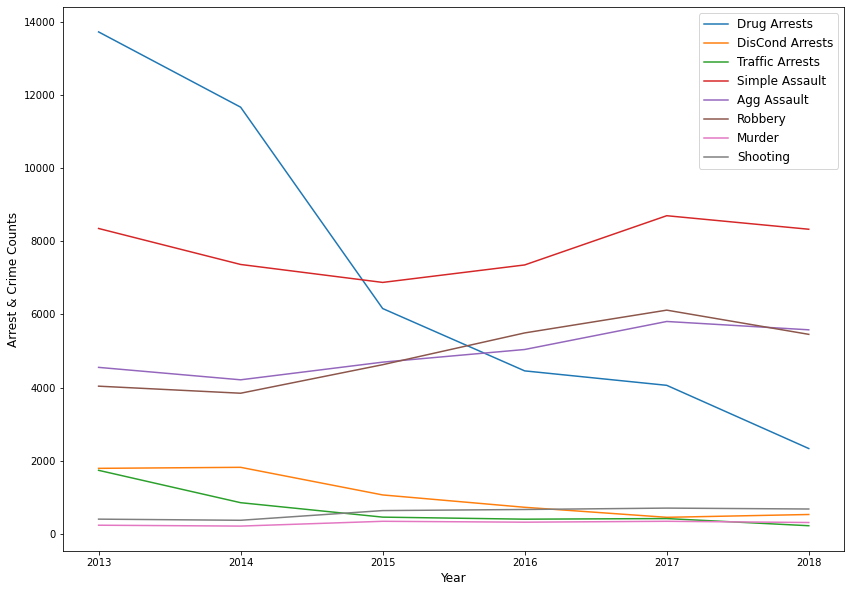

In [6]:
## trend lines for original drug_arr_count', 'discon_arr_count', 'traff_arr_count', 'simaslt_cr_count', 
## 'aggaslt_cr_count', 'robb_cr_count', 'murd_cr_count', 'shoot_cr_count' by year
create_trend_lines_by_grp(df=base_var_df, grp_col='year',
                         cols=['drug_arr_count', 'discon_arr_count', 'traff_arr_count', 'simaslt_cr_count', 
                               'aggaslt_cr_count','robb_cr_count', 'murd_cr_count', 'shoot_cr_count'],
                         x_label='Year', y_label='Arrest & Crime Counts',
                         legend_lst=['Drug Arrests', 'DisCond Arrests', 'Traffic Arrests',
                                    'Simple Assault', 'Agg Assault', 'Robbery', 'Murder', 'Shooting'])

## With original counts, not helpful since number ranges vastly different for drug and murder.

#### Logging to show on same scale/graph

In [8]:
## cells with 0 values give inf when logged. so add 1 to all numeric cols to avoid this problem, log(1)=0; log(0)=inf
'''
When you regress on logs, you have a very particular model in the background. 
Usually, that model doesn't make any sense unless x=0 is matched with y=0. 
If you have some (0,0) pairs there, then just drop them from the regression, 
as they shouldn't give you any useful information about coefficients. 
If you have (x,0) for nonzero x or (0,y) for nonzero y in your data, 
then the model that underlies a log-log regression is a stupid model.

https://marcfbellemare.com/wordpress/12856

https://community.rstudio.com/t/log-transforming-data-with-zeros/51482/3 --> good instr on how to chose a model

Do not log‐transform count data - Excellent article on why count data shouldn't be log transformed and poisson,
neg bino should be used instead
'''

base_var_df_log = base_var_df.loc[:, ['drug_arr_count', 'discon_arr_count', 
                                                                         'traff_arr_count', 'simaslt_cr_count', 
                                                                         'aggaslt_cr_count','robb_cr_count', 
                                                                         'murd_cr_count', 'shoot_cr_count']]

base_var_df_log += 1

base_var_df_log = base_var_df_log.apply(np.log10)

base_var_df_log['year'] = base_var_df['year']
base_var_df_log['area'] = base_var_df['area']


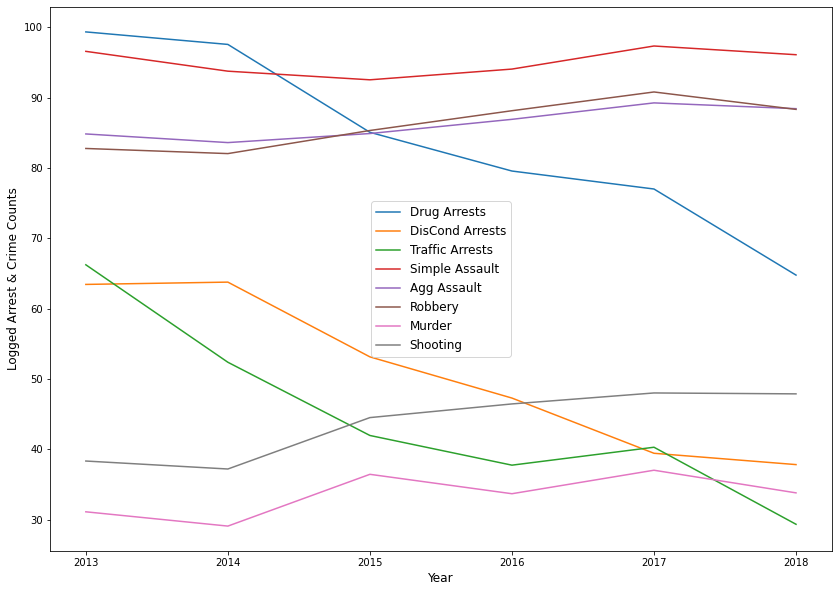

In [9]:
create_trend_lines_by_grp(df=base_var_df_log, grp_col='year',
                         cols=['drug_arr_count', 'discon_arr_count', 'traff_arr_count', 'simaslt_cr_count', 
                               'aggaslt_cr_count','robb_cr_count', 'murd_cr_count', 'shoot_cr_count'],
                         x_label='Year', y_label='Logged Arrest & Crime Counts',
                         legend_lst=['Drug Arrests', 'DisCond Arrests', 'Traffic Arrests',
                                    'Simple Assault', 'Agg Assault', 'Robbery', 'Murder', 'Shooting'])

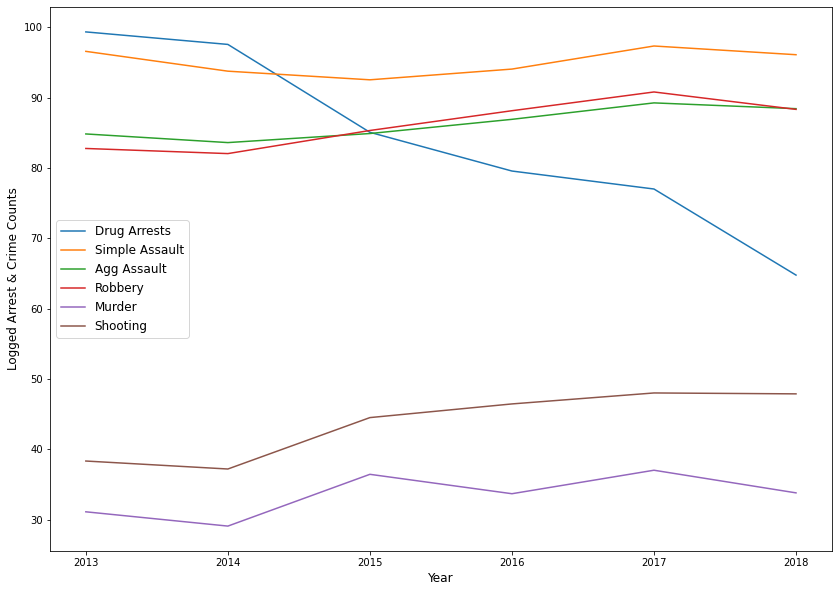

In [10]:
## trend lines for original 'drug_arr_count', 'simaslt_cr_count', 'aggaslt_cr_count', 'robb_cr_count', 
## 'murd_cr_count', 'shoot_cr_count' by year
create_trend_lines_by_grp(df=base_var_df_log, grp_col='year',
                         cols=['drug_arr_count', 'simaslt_cr_count', 'aggaslt_cr_count','robb_cr_count', 
                               'murd_cr_count', 'shoot_cr_count'],
                         x_label='Year', y_label='Logged Arrest & Crime Counts',
                         legend_lst=['Drug Arrests', 'Simple Assault', 'Agg Assault', 'Robbery', 'Murder', 'Shooting'])



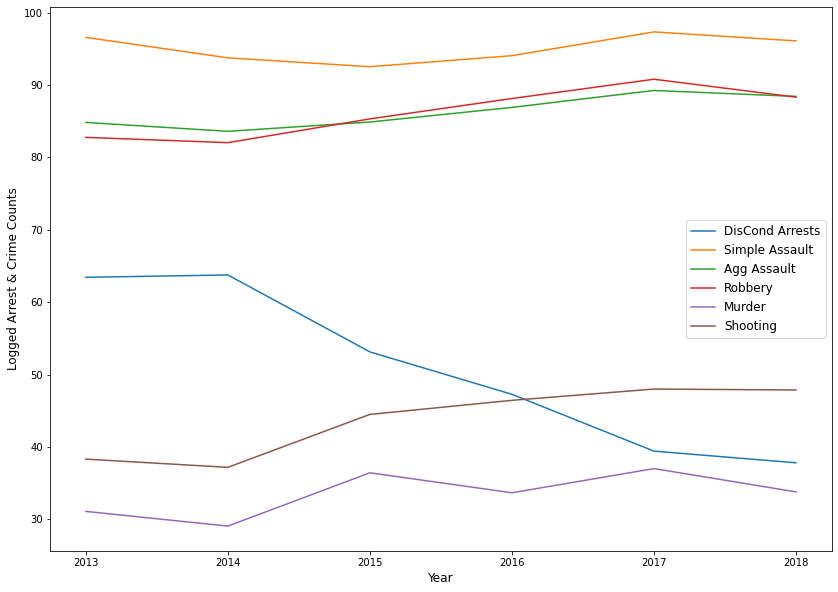

In [11]:
## trend lines for original 'discon_arr_count', 'simaslt_cr_count', 'aggaslt_cr_count', 'robb_cr_count', 
## 'murd_cr_count', 'shoot_cr_count' by year
create_trend_lines_by_grp(df=base_var_df_log, grp_col='year',
                         cols=['discon_arr_count', 'simaslt_cr_count', 'aggaslt_cr_count','robb_cr_count', 
                               'murd_cr_count', 'shoot_cr_count'],
                         x_label='Year', y_label='Logged Arrest & Crime Counts',
                         legend_lst=['DisCond Arrests', 'Simple Assault', 'Agg Assault', 'Robbery', 'Murder', 'Shooting'])



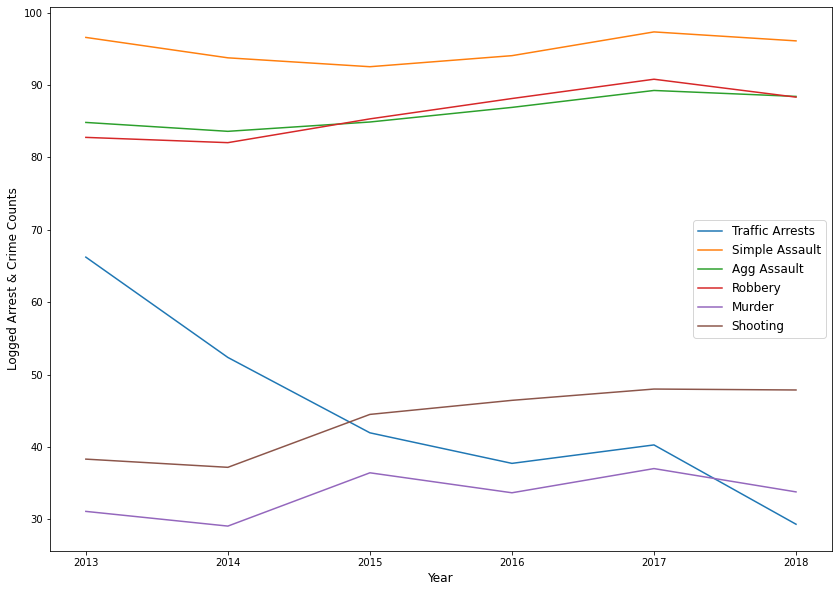

In [12]:
## trend lines for original 'traff_arr_count', 'simaslt_cr_count', 'aggaslt_cr_count', 'robb_cr_count', 
## 'murd_cr_count', 'shoot_cr_count' by year
create_trend_lines_by_grp(df=base_var_df_log, grp_col='year',
                         cols=['traff_arr_count', 'simaslt_cr_count', 'aggaslt_cr_count','robb_cr_count', 
                               'murd_cr_count', 'shoot_cr_count'],
                         x_label='Year', y_label='Logged Arrest & Crime Counts',
                         legend_lst=['Traffic Arrests', 'Simple Assault', 'Agg Assault', 'Robbery', 'Murder', 'Shooting'])



### Trends wrt each disadv index